# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [12]:
data = pd.read_csv('datasets/Categorical.csv')
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


Remove the duplicate index column from the dataset. 

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [17]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].astype('category')
data_mapped['continent'] = data_mapped['continent'].cat.codes
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,4
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,4
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,2
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


## Select the features

In [18]:
x = data_mapped.iloc[:, 1:4]
x

,Longitude,Latitude,continent
0,-69.982677,12.520880,4
1,66.004734,33.835231,2
2,17.537368,-12.293361,0
3,-63.064989,18.223959,4
4,20.049834,41.142450,3
...,...,...,...
236,-172.164851,-13.753243,5
237,47.586762,15.909280,2
238,25.083901,-29.000341,0
239,27.774759,-13.458242,0


In [23]:
x['continent'].unique()

array([4, 2, 0, 3, 7, 5, 1, 6], dtype=int8)

## Clustering

Use 4 clusters initially.

In [35]:
kmeans = KMeans(8)
kmeans.fit(x)

KMeans()

## Clustering results

In [36]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 1, 3, 0, 6, 6, 6, 1, 0, 1, 5, 3, 2, 3, 0, 2, 6, 1, 3, 6, 7, 7,
       4, 6, 1, 0, 0, 6, 0, 6, 0, 0, 0, 0, 0, 4, 4, 3, 7, 6, 0, 4, 7, 7,
       3, 7, 5, 0, 3, 7, 0, 0, 0, 0, 1, 1, 6, 6, 1, 0, 6, 0, 7, 0, 1, 1,
       6, 6, 1, 6, 2, 0, 6, 6, 2, 7, 6, 1, 6, 7, 7, 7, 7, 7, 6, 0, 6, 0,
       2, 0, 4, 3, 0, 6, 0, 6, 4, 6, 4, 4, 3, 6, 1, 1, 6, 1, 6, 0, 6, 1,
       4, 1, 1, 3, 1, 4, 0, 0, 4, 6, 1, 4, 1, 7, 6, 0, 6, 4, 3, 6, 6, 6,
       4, 0, 7, 6, 6, 3, 4, 0, 2, 6, 7, 6, 4, 6, 4, 2, 3, 7, 0, 3, 3, 4,
       3, 2, 7, 2, 7, 0, 5, 6, 6, 4, 2, 2, 1, 1, 0, 5, 0, 4, 2, 2, 6, 0,
       4, 6, 0, 1, 5, 1, 6, 4, 3, 7, 1, 1, 3, 7, 4, 0, 7, 2, 7, 0, 6, 1,
       3, 0, 6, 7, 0, 6, 6, 6, 3, 0, 3, 1, 0, 7, 7, 4, 1, 1, 2, 5, 0, 6,
       1, 4, 3, 3, 6, 0, 0, 1, 6, 0, 0, 0, 0, 4, 2, 5, 5, 1, 3, 3, 3],
      dtype=int32)

In [37]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,4,0
1,Afghanistan,66.004734,33.835231,2,1
2,Angola,17.537368,-12.293361,0,3
3,Anguilla,-63.064989,18.223959,4,0
4,Albania,20.049834,41.142450,3,6
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,5
237,Yemen,47.586762,15.909280,2,1
238,South Africa,25.083901,-29.000341,0,3
239,Zambia,27.774759,-13.458242,0,3


## Plot the data

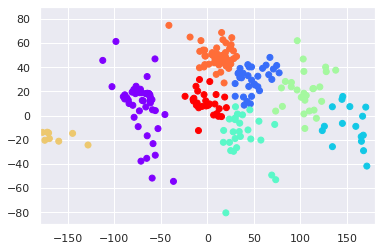

In [38]:
plt.scatter(data_with_clusters['Longitude'], data['Latitude'], c = data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.